In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4/ВИМ/Lab5/heart.csv')

In [ ]:
df.shape

(303, 14)

age - возраст пациента

sex - пол

cp - характер боли в груди(1 - типичная ангина, 2 - атипичная ангина, 3 - боль не из-за ангины, 4 - асимптоматическая боль)

chol - уровень холестирина

fbs - повышенный уровень сахара(>120 mg/dl)

restecg - результаты кардиографии (0 - норма, 1 - элевация ST-сегмента, 2 - гипертония)

thalachh - максимальная ЧС

exng - былал ли ангина

oldpeak - предыдущий пик

slp - slope

caa - количество главных сосудов [0,3]

thall - результат стресс-теста [0,3]

output - target

Датасет был выбран, т.к. много численных значений, отстутвуют пропуски в данных.

In [ ]:
df.head()

age  sex  cp  trtbps  chol  fbs  ...  exng  oldpeak  slp  caa  thall  output
0   63    1   3     145   233    1  ...     0      2.3    0    0      1       1
1   37    1   2     130   250    0  ...     0      3.5    0    0      2       1
2   41    0   1     130   204    0  ...     0      1.4    2    0      2       1
3   56    1   1     120   236    0  ...     0      0.8    2    0      2       1
4   57    0   0     120   354    0  ...     1      0.6    2    0      2       1

[5 rows x 14 columns]

In [ ]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

unique count
age                 41
sex                  2
cp                   4
trtbps              49
chol               152
fbs                  2
restecg              3
thalachh            91
exng                 2
oldpeak             40
slp                  3
caa                  5
thall                4
output               2

Разделим признаки на категориальные и числовые

In [ ]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

In [ ]:
df[con_cols].describe()

age      trtbps        chol    thalachh     oldpeak
count  303.000000  303.000000  303.000000  303.000000  303.000000
mean    54.366337  131.623762  246.264026  149.646865    1.039604
std      9.082101   17.538143   51.830751   22.905161    1.161075
min     29.000000   94.000000  126.000000   71.000000    0.000000
25%     47.500000  120.000000  211.000000  133.500000    0.000000
50%     55.000000  130.000000  240.000000  153.000000    0.800000
75%     61.000000  140.000000  274.500000  166.000000    1.600000
max     77.000000  200.000000  564.000000  202.000000    6.200000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Корреляционная матрица

In [ ]:
df_corr = df[con_cols].corr()
df_corr

age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000

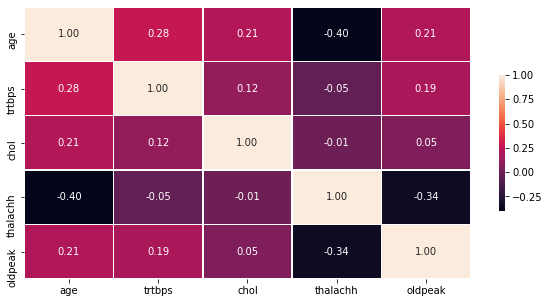

In [ ]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(df_corr, annot=True, fmt='.2f',linewidths=.5, cbar_kws={"shrink": .5})

Проведем масштабирование

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df1 = df
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = True)

# признаки и таргет
X = df1.drop(['output'],axis=1)
y = df1[['output']]

In [ ]:
scaler = RobustScaler()

In [ ]:
X[con_cols] = scaler.fit_transform(X[con_cols])
X.head()

age  trtbps      chol  thalachh  ...  slp_2  thall_1  thall_2  thall_3
0  0.592593    0.75 -0.110236 -0.092308  ...      0        1        0        0
1 -1.333333    0.00  0.157480  1.046154  ...      0        0        1        0
2 -1.037037    0.00 -0.566929  0.584615  ...      1        0        1        0
3  0.074074   -0.50 -0.062992  0.769231  ...      1        0        1        0
4  0.148148   -0.50  1.795276  0.307692  ...      1        0        1        0

[5 rows x 22 columns]

Разобъем выборку на тестовую и тренировочную

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.shape

(242, 22)

In [ ]:
X_test.shape

(61, 22)

Логистическая регрессия

In [ ]:
logi = LogisticRegression(C=0.7, random_state=42)
logi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logi.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8852459016393442

In [ ]:
from sklearn.metrics import roc_curve

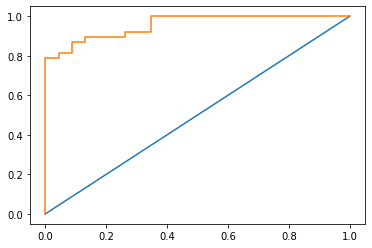

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, logi.predict_proba(X_test)[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)

Градиентный спуск

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sdvg = SGDClassifier(loss='log',alpha=0.0001, max_iter=1000, random_state=42)

In [ ]:
sdvg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
y_pred_gd = sdvg.predict(X_test)

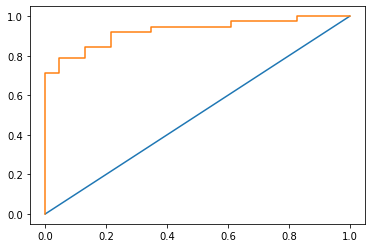

In [ ]:
# LOG
fpr, tpr, thresholds = roc_curve(y_test, sdvg.predict_proba(X_test)[:,1])
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)

In [ ]:
accuracy_score(y_test, y_pred_gd)

0.8524590163934426

Деревья решений

In [ ]:
tre = DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, random_state=42)

In [ ]:
tre.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_tre = tre.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_tre)

0.8360655737704918

Выводы и оценка качества

In [ ]:
from sklearn.metrics import * 

In [ ]:
print(classification_report(y_test, logi.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [ ]:
print(classification_report(y_test, sdvg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        25
           1       0.89      0.86      0.87        36

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
print(classification_report(y_test, tre.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.88      0.83      0.86        36

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61

